Libraries

In [10]:
import numpy             as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math
from sklearn.neighbors    import KNeighborsClassifier
from sklearn.linear_model import LinearRegression

Define Simulated X and Y Variables

In [11]:
np.random.seed(4042)

centers = 10
params  = 2 

# Generate Class Labels
y_vec_1 = np.zeros( (centers), dtype = int )
y_vec_2 = np.ones ( (centers), dtype = int )

# Create Centers
m_1 = np.column_stack( (y_vec_1, y_vec_2) )
m_2 = np.column_stack( (y_vec_2, y_vec_1) )

# Generate X Matrices
x_mat_1 = np.random.normal( 0.0, 1.0, (centers, params) ) + m_2
x_mat_2 = np.random.normal( 0.0, 1.0, (centers, params) ) + m_1

Function to Generate Data

In [12]:
n_train = 100
n_test  = 5000
std_dev = math.sqrt(1 / 5)

def CreateData(k, n, p, std):
    alloc_1 = np.random.choice( range(k), n, replace = True )
    alloc_2 = np.random.choice( range(k), n, replace = True )

    x = np.random.normal( 0.0, 1.0, (2 * n, p) ) * std + np.concatenate( (x_mat_1[alloc_1], x_mat_2[alloc_2]) )
    y = np.concatenate( ( np.ones(n, dtype = int), np.zeros(n, dtype = int) ) )
    
    return (x, y)

Generate Data

In [13]:
x_train, y_train = CreateData( centers, n_train, params, std_dev )
x_test,  y_test  = CreateData( centers, n_test,  params, std_dev )

K Nearest Neighbors Classifier

In [14]:
n_neighbors = [151, 101, 69, 45, 31, 21, 11, 7, 5, 3, 1]
iterations  = len(n_neighbors)

train_err_knn = np.zeros(iterations)
test_err_knn  = np.zeros(iterations)

for i in range(iterations):
    knn = KNeighborsClassifier(n_neighbors[i])
    knn.fit(x_train, y_train)  
    
    y_train_pred     = knn.predict(x_train)
    train_err_knn[i] = sum( y_train != y_train_pred ) / (2 * n_train)
    
    y_test_pred     = knn.predict(x_test)
    test_err_knn[i] = sum( y_test != y_test_pred ) / (2 * n_test) 

Linear Regression Classifier

In [15]:
reg_model = LinearRegression()
reg_model.fit( x_train, y_train )

coefs  = reg_model.coef_
inter  = reg_model.intercept_

y_train_pred = np.greater(reg_model.predict(x_train), 0.5).astype(int)
y_test_pred  = np.greater(reg_model.predict(x_test),  0.5).astype(int)

train_err_lm = sum( y_train != y_train_pred ) / len(y_train) 
test_err_lm  = sum( y_test  != y_test_pred )  / len(y_test) 

Function for Bayes Classifier

In [16]:
def MixNorm(x):
    return\
    np.sum(np.exp(-1 * np.sum( np.power( np.subtract( np.transpose(x_mat_1), x.reshape(2, 1) ), 2) ) * 5 / 2)) /\
    np.sum(np.exp(-1 * np.sum( np.power( np.subtract( np.transpose(x_mat_2), x.reshape(2, 1) ), 2) ) * 5 / 2))

Bayes Classifier

In [17]:
y_test_pred = np.apply_along_axis(MixNorm, 1, x_test)
y_test_pred = np.greater(y_test_pred, 1).astype(int)

test_err_bayes = sum(y_test != y_test_pred) / len(y_test)

Visualization of the Errors

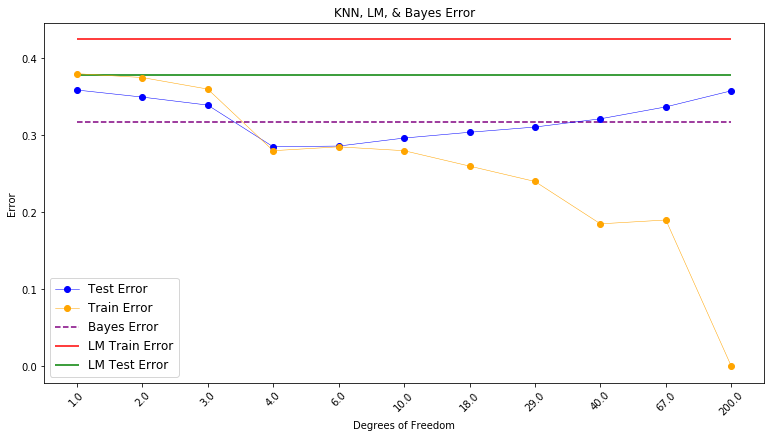

In [18]:
x_axis = np.round(np.divide(len(x_train), n_neighbors)).tolist()
figure = plt.figure(figsize = (10, 5))
axes   = figure.add_axes([0, 0, 1, 1])

axes.plot(range(1, 12), test_err_knn,  color = "blue",   linestyle = "-", linewidth = 0.5, label = "Test Error",  marker = "o")
axes.plot(range(1, 12), train_err_knn, color = "orange", linestyle = "-", linewidth = 0.5, label = "Train Error", marker = "o")

axes.hlines(test_err_bayes, xmin = 1, xmax = 11, color = "purple", linestyle = "--", label = "Bayes Error")
axes.hlines(train_err_lm,   xmin = 1, xmax = 11, color = "red",    linestyle = "-",  label = "LM Train Error")
axes.hlines(test_err_lm,    xmin = 1, xmax = 11, color = "green",  linestyle = "-",  label = "LM Test Error")

axes.xaxis.set_major_locator(ticker.IndexLocator(base = 1, offset = 0))
axes.set_xticklabels(x_axis, rotation = 45)

axes.set(xlabel = "Degrees of Freedom", ylabel = "Error", title = "KNN, LM, & Bayes Error")
axes.legend(loc = "lower left", prop = {'size' : 12})

figure.savefig("AssignmentOutput_1_4042_sbishop3.pdf", bbox_inches = 'tight')
plt.show()